In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
tf.__version__

'2.0.0'

In [3]:
data = pd.read_csv('Churn_Modelling.csv')

In [4]:
data.shape

(10000, 14)

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
len(data['RowNumber'].unique()), len(data['CustomerId'].unique())

(10000, 10000)

In [7]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [8]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


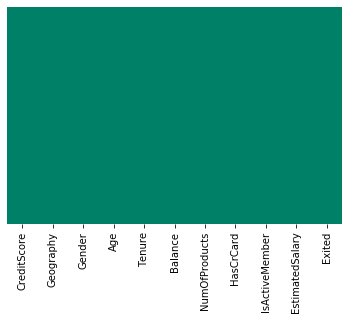

In [9]:
sb.heatmap(data.isna(),
          cbar = False,
          yticklabels = False,
          cmap = 'summer')
plt.show()

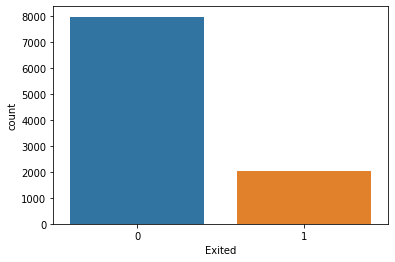

In [10]:
sb.countplot(data['Exited'])
plt.show()

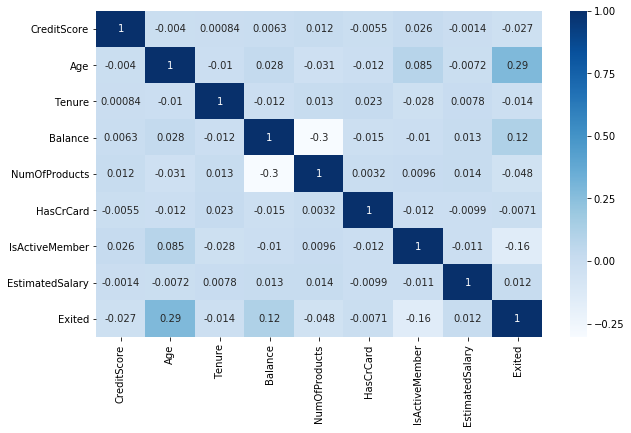

In [11]:
fig, ax = plt.subplots(figsize = (10, 6))

corr = data.corr()
ax = sb.heatmap(corr,
          annot = True,
          cmap = 'Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [12]:
data[data.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


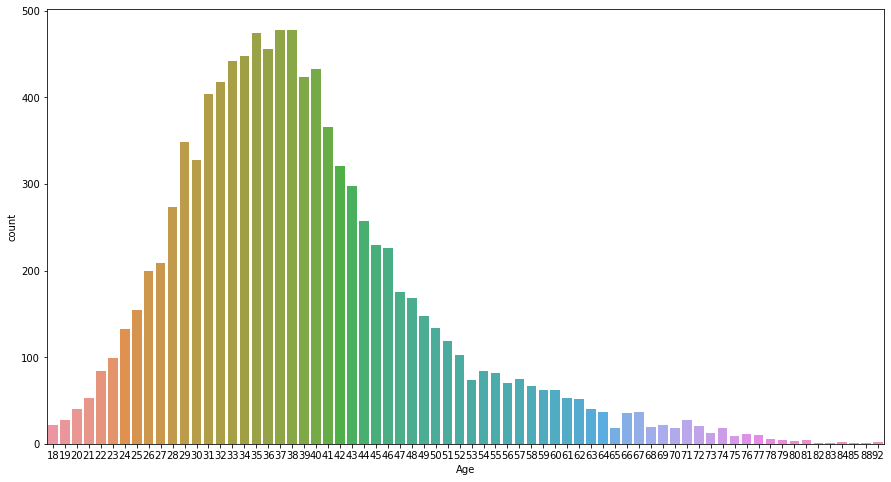

In [13]:
fig, ax = plt.subplots(figsize = (15, 8))

sb.countplot(data['Age'])
plt.show()

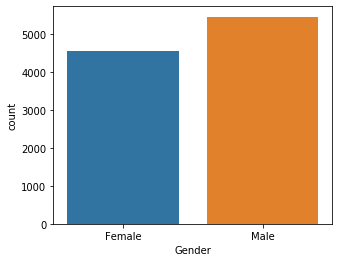

In [14]:
fig, ax = plt.subplots(figsize = (5, 4))

sb.countplot(data['Gender'])
plt.show()

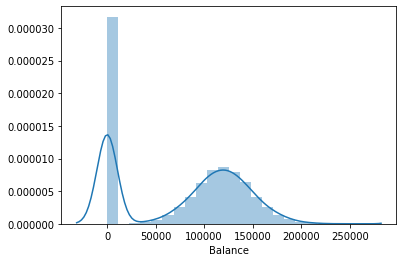

In [15]:
sb.distplot(data['Balance'])
plt.show()

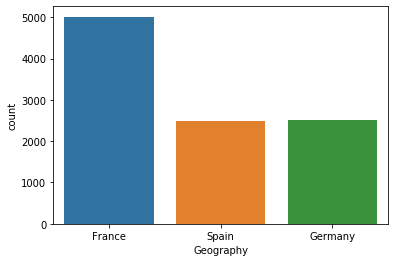

In [16]:
sb.countplot(data['Geography'])
plt.show()

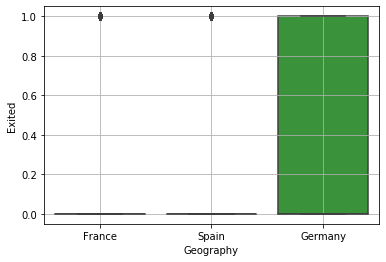

In [17]:
sb.boxplot(x = 'Geography', 
           y = 'Exited', 
           data = data)
plt.grid()
plt.show()

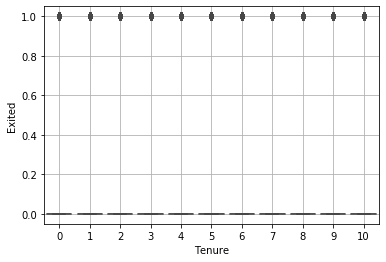

In [18]:
sb.boxplot(x = 'Tenure', 
           y = 'Exited', 
           data = data)
plt.grid()
plt.show()

In [19]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data Preprocessing

In [20]:
data['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [21]:
data['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [22]:
sc = StandardScaler()
data.iloc[:, [0,3,5,9]] = sc.fit_transform(data.iloc[:,[0,3,5,9]])

In [23]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,France,Female,0.293517,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,Spain,Female,0.198164,1,0.117350,1,0,1,0.216534,0
2,-1.536794,France,Female,0.293517,8,1.333053,3,1,0,0.240687,1
3,0.501521,France,Female,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,Spain,Female,0.388871,2,0.785728,1,1,1,-0.365276,0


In [24]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1:].values

In [25]:
X.shape, Y.shape

((10000, 10), (10000, 1))

In [26]:
X[1]

array([-0.4400359548576657, 'Spain', 'Female', 0.1981638321954454, 1,
       0.11735002143511059, 1, 0, 1, 0.21653375188734025], dtype=object)

In [27]:
lb = LabelEncoder()
X[:, 1] = lb.fit_transform(X[:, 1])
X[:, 2] = lb.fit_transform(X[:, 2])

In [28]:
X[1]

array([-0.4400359548576657, 2, 0, 0.1981638321954454, 1,
       0.11735002143511059, 1, 0, 1, 0.21653375188734025], dtype=object)

In [29]:
ohe = OneHotEncoder(categorical_features = [1])
X = ohe.fit_transform(X).toarray()

In [30]:
X[1]

array([ 0.        ,  0.        ,  1.        , -0.44003595,  0.        ,
        0.19816383,  1.        ,  0.11735002,  1.        ,  0.        ,
        1.        ,  0.21653375])

In [31]:
X = X[:, 1:]

In [32]:
X[1]

array([ 0.        ,  1.        , -0.44003595,  0.        ,  0.19816383,
        1.        ,  0.11735002,  1.        ,  0.        ,  1.        ,
        0.21653375])

In [33]:
X.shape

(10000, 11)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [35]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8000, 11), (8000, 1), (2000, 11), (2000, 1))

# Creating Placeholders

To create placeholders we need to disable the eager execution as place holders are not compatible with eager execution

In [36]:
tf.compat.v1.disable_eager_execution()

In [37]:
x = tf.compat.v1.placeholder(dtype = 'float32', name = 'x')
y = tf.compat.v1.placeholder(dtype = 'float32', name = 'y')

In [38]:
x, y

(<tf.Tensor 'x:0' shape=<unknown> dtype=float32>,
 <tf.Tensor 'y:0' shape=<unknown> dtype=float32>)

# Initialising weights and bias

In [39]:
sigma = 1
weight_initializer = tf.compat.v1.variance_scaling_initializer(mode = 'fan_avg', distribution = 'uniform', scale = sigma) 
bias_initializer = tf.zeros_initializer()

In [40]:
#Weights and Bias of 1st Layer
w1 = tf.Variable(weight_initializer([x_train.shape[1], 10]))
b1 = tf.Variable(bias_initializer([10]))

#Weights and Bias of 2nd layer
w2 = tf.Variable(weight_initializer([10, 10]))
b2 = tf.Variable(bias_initializer([10]))

#Weights and Bias of 3rd layer
w3 = tf.Variable(weight_initializer([10, 8]))
b3 = tf.Variable(bias_initializer([8]))


#Weights and Bias of output layer
wo = tf.Variable(weight_initializer([8, 1]))
bo = tf.Variable(bias_initializer([1]))

init = tf.compat.v1.global_variables_initializer()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [41]:
w1, b1

(<tf.Variable 'Variable:0' shape=(11, 10) dtype=float32>,
 <tf.Variable 'Variable_1:0' shape=(10,) dtype=float32>)

In [42]:
w2, b2

(<tf.Variable 'Variable_2:0' shape=(10, 10) dtype=float32>,
 <tf.Variable 'Variable_3:0' shape=(10,) dtype=float32>)

In [43]:
w3, b3

(<tf.Variable 'Variable_4:0' shape=(10, 8) dtype=float32>,
 <tf.Variable 'Variable_5:0' shape=(8,) dtype=float32>)

In [44]:
wo, bo

(<tf.Variable 'Variable_6:0' shape=(8, 1) dtype=float32>,
 <tf.Variable 'Variable_7:0' shape=(1,) dtype=float32>)

# Forward Propagation

In [45]:
#Layer1
hidden1 = tf.add(tf.matmul(x, w1), b1)
hidden1 = tf.nn.relu(hidden1)

#layer2
hidden2 = tf.add(tf.matmul(hidden1, w2), b2)
hidden2 = tf.nn.relu(hidden2)

#layer3
hidden3 = tf.add(tf.matmul(hidden2, w3), b3)
hidden3 = tf.nn.relu(hidden3)

#output layer
out = tf.add(tf.matmul(hidden3, wo), bo, name = 'output')

In [46]:
hidden1, hidden2, out

(<tf.Tensor 'Relu:0' shape=<unknown> dtype=float32>,
 <tf.Tensor 'Relu_1:0' shape=<unknown> dtype=float32>,
 <tf.Tensor 'output:0' shape=<unknown> dtype=float32>)

# Cost Function

In [47]:
cost_function = tf.reduce_mean(tf.square(out - y))

In [48]:
cost_function

<tf.Tensor 'Mean:0' shape=() dtype=float32>

# Optimizer

In [49]:
learning_rate = 0.01
opt = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

# launching the graph in Session

In [50]:
sess = tf.compat.v1.Session()
sess.run(init)

In [51]:
sess

# Back Propagation

In [52]:
Training_loss = [ ]
Test_loss = [ ]
epochs = 1500
for epoch in range (epochs):
    sess.run(opt, feed_dict = {x: x_train, y: y_train})
    
    Training_loss.append(sess.run(cost_function, feed_dict = {x: x_train, y: y_train}))
    Test_loss.append(sess.run(cost_function, feed_dict = {x: x_test, y: y_test}))
    
    print('Epoch:', epoch, 'Training Loss:', Training_loss[epoch], 'Test Loss:', Test_loss[epoch])

Epoch: 0 Training Loss: 0.27095228 Test Loss: 0.28105533
Epoch: 1 Training Loss: 0.25627562 Test Loss: 0.26346597
Epoch: 2 Training Loss: 0.2520574 Test Loss: 0.25814185
Epoch: 3 Training Loss: 0.24848305 Test Loss: 0.2538558
Epoch: 4 Training Loss: 0.24522677 Test Loss: 0.25000432
Epoch: 5 Training Loss: 0.24224333 Test Loss: 0.24646196
Epoch: 6 Training Loss: 0.23947626 Test Loss: 0.24315315
Epoch: 7 Training Loss: 0.23687491 Test Loss: 0.24008158
Epoch: 8 Training Loss: 0.2344167 Test Loss: 0.23721024
Epoch: 9 Training Loss: 0.23209867 Test Loss: 0.23452
Epoch: 10 Training Loss: 0.22990543 Test Loss: 0.2320112
Epoch: 11 Training Loss: 0.22780728 Test Loss: 0.22961813
Epoch: 12 Training Loss: 0.22579913 Test Loss: 0.22733065
Epoch: 13 Training Loss: 0.22386234 Test Loss: 0.22514282
Epoch: 14 Training Loss: 0.22198579 Test Loss: 0.22303802
Epoch: 15 Training Loss: 0.22017944 Test Loss: 0.22100313
Epoch: 16 Training Loss: 0.21845745 Test Loss: 0.21905774
Epoch: 17 Training Loss: 0.2168

Epoch: 148 Training Loss: 0.16047549 Test Loss: 0.15595314
Epoch: 149 Training Loss: 0.16036856 Test Loss: 0.15585324
Epoch: 150 Training Loss: 0.16026227 Test Loss: 0.1557531
Epoch: 151 Training Loss: 0.16015677 Test Loss: 0.155654
Epoch: 152 Training Loss: 0.16005278 Test Loss: 0.15555586
Epoch: 153 Training Loss: 0.1599503 Test Loss: 0.15545984
Epoch: 154 Training Loss: 0.15984866 Test Loss: 0.15536588
Epoch: 155 Training Loss: 0.15974814 Test Loss: 0.15527347
Epoch: 156 Training Loss: 0.1596484 Test Loss: 0.15518188
Epoch: 157 Training Loss: 0.1595502 Test Loss: 0.15509069
Epoch: 158 Training Loss: 0.1594531 Test Loss: 0.15500128
Epoch: 159 Training Loss: 0.15935607 Test Loss: 0.15491223
Epoch: 160 Training Loss: 0.15925959 Test Loss: 0.15482435
Epoch: 161 Training Loss: 0.1591641 Test Loss: 0.15473789
Epoch: 162 Training Loss: 0.15906793 Test Loss: 0.15465176
Epoch: 163 Training Loss: 0.15897271 Test Loss: 0.15456566
Epoch: 164 Training Loss: 0.15887873 Test Loss: 0.15448077
Epoch

Epoch: 300 Training Loss: 0.1515716 Test Loss: 0.14766799
Epoch: 301 Training Loss: 0.15154271 Test Loss: 0.14763829
Epoch: 302 Training Loss: 0.15151407 Test Loss: 0.14760901
Epoch: 303 Training Loss: 0.15148547 Test Loss: 0.14758
Epoch: 304 Training Loss: 0.15145734 Test Loss: 0.14755173
Epoch: 305 Training Loss: 0.1514292 Test Loss: 0.1475236
Epoch: 306 Training Loss: 0.151401 Test Loss: 0.14749509
Epoch: 307 Training Loss: 0.15137304 Test Loss: 0.14746769
Epoch: 308 Training Loss: 0.15134524 Test Loss: 0.14744043
Epoch: 309 Training Loss: 0.15131772 Test Loss: 0.14741361
Epoch: 310 Training Loss: 0.15129021 Test Loss: 0.14738698
Epoch: 311 Training Loss: 0.15126275 Test Loss: 0.1473602
Epoch: 312 Training Loss: 0.15123563 Test Loss: 0.14733359
Epoch: 313 Training Loss: 0.1512086 Test Loss: 0.14730717
Epoch: 314 Training Loss: 0.15118168 Test Loss: 0.14728124
Epoch: 315 Training Loss: 0.15115507 Test Loss: 0.14725573
Epoch: 316 Training Loss: 0.15112875 Test Loss: 0.14723067
Epoch: 

Epoch: 456 Training Loss: 0.14844027 Test Loss: 0.14479423
Epoch: 457 Training Loss: 0.14842737 Test Loss: 0.14478242
Epoch: 458 Training Loss: 0.14841437 Test Loss: 0.14477053
Epoch: 459 Training Loss: 0.14840145 Test Loss: 0.14475861
Epoch: 460 Training Loss: 0.14838846 Test Loss: 0.14474668
Epoch: 461 Training Loss: 0.14837568 Test Loss: 0.14473471
Epoch: 462 Training Loss: 0.14836302 Test Loss: 0.14472282
Epoch: 463 Training Loss: 0.14835034 Test Loss: 0.14471109
Epoch: 464 Training Loss: 0.14833775 Test Loss: 0.14469951
Epoch: 465 Training Loss: 0.14832518 Test Loss: 0.14468789
Epoch: 466 Training Loss: 0.14831266 Test Loss: 0.14467639
Epoch: 467 Training Loss: 0.14830013 Test Loss: 0.14466488
Epoch: 468 Training Loss: 0.14828779 Test Loss: 0.14465341
Epoch: 469 Training Loss: 0.14827543 Test Loss: 0.1446419
Epoch: 470 Training Loss: 0.14826304 Test Loss: 0.14463057
Epoch: 471 Training Loss: 0.1482508 Test Loss: 0.14461933
Epoch: 472 Training Loss: 0.1482385 Test Loss: 0.14460827


Epoch: 610 Training Loss: 0.14693663 Test Loss: 0.14333352
Epoch: 611 Training Loss: 0.14692897 Test Loss: 0.14332584
Epoch: 612 Training Loss: 0.14692141 Test Loss: 0.14331807
Epoch: 613 Training Loss: 0.14691386 Test Loss: 0.14331034
Epoch: 614 Training Loss: 0.1469063 Test Loss: 0.14330271
Epoch: 615 Training Loss: 0.14689878 Test Loss: 0.14329508
Epoch: 616 Training Loss: 0.14689128 Test Loss: 0.14328754
Epoch: 617 Training Loss: 0.14688382 Test Loss: 0.14328007
Epoch: 618 Training Loss: 0.14687632 Test Loss: 0.14327262
Epoch: 619 Training Loss: 0.14686881 Test Loss: 0.14326516
Epoch: 620 Training Loss: 0.1468613 Test Loss: 0.14325759
Epoch: 621 Training Loss: 0.14685374 Test Loss: 0.14324994
Epoch: 622 Training Loss: 0.1468463 Test Loss: 0.1432424
Epoch: 623 Training Loss: 0.1468389 Test Loss: 0.14323486
Epoch: 624 Training Loss: 0.14683148 Test Loss: 0.14322744
Epoch: 625 Training Loss: 0.14682409 Test Loss: 0.14321998
Epoch: 626 Training Loss: 0.14681673 Test Loss: 0.1432125
Epo

Epoch: 764 Training Loss: 0.14593993 Test Loss: 0.14235704
Epoch: 765 Training Loss: 0.14593439 Test Loss: 0.14235172
Epoch: 766 Training Loss: 0.14592876 Test Loss: 0.14234635
Epoch: 767 Training Loss: 0.1459232 Test Loss: 0.14234103
Epoch: 768 Training Loss: 0.14591776 Test Loss: 0.14233574
Epoch: 769 Training Loss: 0.14591223 Test Loss: 0.14233044
Epoch: 770 Training Loss: 0.1459068 Test Loss: 0.1423252
Epoch: 771 Training Loss: 0.14590125 Test Loss: 0.14231983
Epoch: 772 Training Loss: 0.14589576 Test Loss: 0.14231454
Epoch: 773 Training Loss: 0.14589027 Test Loss: 0.14230928
Epoch: 774 Training Loss: 0.14588478 Test Loss: 0.14230403
Epoch: 775 Training Loss: 0.14587936 Test Loss: 0.14229882
Epoch: 776 Training Loss: 0.14587393 Test Loss: 0.14229354
Epoch: 777 Training Loss: 0.14586851 Test Loss: 0.14228836
Epoch: 778 Training Loss: 0.14586309 Test Loss: 0.1422832
Epoch: 779 Training Loss: 0.14585772 Test Loss: 0.14227809
Epoch: 780 Training Loss: 0.14585236 Test Loss: 0.14227295
E

Epoch: 904 Training Loss: 0.14523526 Test Loss: 0.1416898
Epoch: 905 Training Loss: 0.14523052 Test Loss: 0.14168534
Epoch: 906 Training Loss: 0.14522585 Test Loss: 0.14168082
Epoch: 907 Training Loss: 0.14522113 Test Loss: 0.14167637
Epoch: 908 Training Loss: 0.14521645 Test Loss: 0.14167188
Epoch: 909 Training Loss: 0.14521179 Test Loss: 0.14166735
Epoch: 910 Training Loss: 0.14520709 Test Loss: 0.14166285
Epoch: 911 Training Loss: 0.14520243 Test Loss: 0.14165841
Epoch: 912 Training Loss: 0.14519775 Test Loss: 0.14165393
Epoch: 913 Training Loss: 0.14519309 Test Loss: 0.14164941
Epoch: 914 Training Loss: 0.14518851 Test Loss: 0.14164491
Epoch: 915 Training Loss: 0.14518383 Test Loss: 0.14164035
Epoch: 916 Training Loss: 0.14517917 Test Loss: 0.14163585
Epoch: 917 Training Loss: 0.14517453 Test Loss: 0.14163132
Epoch: 918 Training Loss: 0.14516988 Test Loss: 0.14162678
Epoch: 919 Training Loss: 0.14516528 Test Loss: 0.14162226
Epoch: 920 Training Loss: 0.14516068 Test Loss: 0.1416177

Epoch: 1055 Training Loss: 0.14459029 Test Loss: 0.14104937
Epoch: 1056 Training Loss: 0.14458646 Test Loss: 0.14104539
Epoch: 1057 Training Loss: 0.14458264 Test Loss: 0.14104147
Epoch: 1058 Training Loss: 0.14457884 Test Loss: 0.14103751
Epoch: 1059 Training Loss: 0.14457497 Test Loss: 0.14103363
Epoch: 1060 Training Loss: 0.14457117 Test Loss: 0.1410297
Epoch: 1061 Training Loss: 0.14456734 Test Loss: 0.1410258
Epoch: 1062 Training Loss: 0.14456351 Test Loss: 0.14102186
Epoch: 1063 Training Loss: 0.14455968 Test Loss: 0.14101796
Epoch: 1064 Training Loss: 0.14455587 Test Loss: 0.14101404
Epoch: 1065 Training Loss: 0.1445521 Test Loss: 0.14101017
Epoch: 1066 Training Loss: 0.14454834 Test Loss: 0.14100629
Epoch: 1067 Training Loss: 0.14454459 Test Loss: 0.14100239
Epoch: 1068 Training Loss: 0.1445408 Test Loss: 0.14099847
Epoch: 1069 Training Loss: 0.14453705 Test Loss: 0.14099465
Epoch: 1070 Training Loss: 0.14453328 Test Loss: 0.14099072
Epoch: 1071 Training Loss: 0.14452952 Test L

Epoch: 1228 Training Loss: 0.14398164 Test Loss: 0.14043592
Epoch: 1229 Training Loss: 0.14397836 Test Loss: 0.14043269
Epoch: 1230 Training Loss: 0.1439751 Test Loss: 0.14042951
Epoch: 1231 Training Loss: 0.14397182 Test Loss: 0.14042626
Epoch: 1232 Training Loss: 0.14396852 Test Loss: 0.14042303
Epoch: 1233 Training Loss: 0.14396521 Test Loss: 0.14041977
Epoch: 1234 Training Loss: 0.14396198 Test Loss: 0.14041659
Epoch: 1235 Training Loss: 0.14395875 Test Loss: 0.1404133
Epoch: 1236 Training Loss: 0.14395545 Test Loss: 0.1404101
Epoch: 1237 Training Loss: 0.1439522 Test Loss: 0.14040689
Epoch: 1238 Training Loss: 0.14394888 Test Loss: 0.14040366
Epoch: 1239 Training Loss: 0.14394568 Test Loss: 0.14040044
Epoch: 1240 Training Loss: 0.14394236 Test Loss: 0.14039719
Epoch: 1241 Training Loss: 0.14393912 Test Loss: 0.14039405
Epoch: 1242 Training Loss: 0.14393577 Test Loss: 0.14039075
Epoch: 1243 Training Loss: 0.14393246 Test Loss: 0.14038758
Epoch: 1244 Training Loss: 0.14392924 Test L

Epoch: 1397 Training Loss: 0.14346415 Test Loss: 0.13992059
Epoch: 1398 Training Loss: 0.14346123 Test Loss: 0.13991764
Epoch: 1399 Training Loss: 0.14345834 Test Loss: 0.13991477
Epoch: 1400 Training Loss: 0.14345554 Test Loss: 0.13991182
Epoch: 1401 Training Loss: 0.14345257 Test Loss: 0.13990887
Epoch: 1402 Training Loss: 0.1434497 Test Loss: 0.13990597
Epoch: 1403 Training Loss: 0.1434468 Test Loss: 0.13990296
Epoch: 1404 Training Loss: 0.14344397 Test Loss: 0.13990006
Epoch: 1405 Training Loss: 0.14344107 Test Loss: 0.13989711
Epoch: 1406 Training Loss: 0.14343818 Test Loss: 0.1398941
Epoch: 1407 Training Loss: 0.14343536 Test Loss: 0.13989118
Epoch: 1408 Training Loss: 0.14343247 Test Loss: 0.1398882
Epoch: 1409 Training Loss: 0.14342958 Test Loss: 0.13988529
Epoch: 1410 Training Loss: 0.14342673 Test Loss: 0.1398823
Epoch: 1411 Training Loss: 0.14342389 Test Loss: 0.13987927
Epoch: 1412 Training Loss: 0.14342102 Test Loss: 0.13987632
Epoch: 1413 Training Loss: 0.14341816 Test Lo

In [53]:
y_pred = sess.run(out, feed_dict = {x: x_test})

In [54]:
y_pred

array([[0.27347443],
       [0.33827376],
       [0.20757052],
       ...,
       [0.24407822],
       [0.07727322],
       [0.20401123]], dtype=float32)

In [55]:
y_pred = (y_pred > 0.5)

In [56]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [57]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1566,   29],
       [ 376,   29]])

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1595
           1       0.50      0.07      0.13       405

    accuracy                           0.80      2000
   macro avg       0.65      0.53      0.51      2000
weighted avg       0.74      0.80      0.73      2000



In [59]:
print(accuracy_score(y_test, y_pred))

0.7975


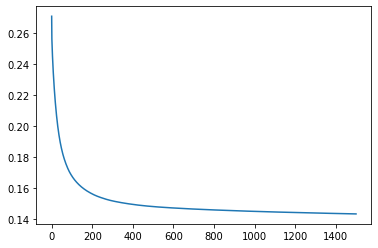

In [60]:
plt.plot(Training_loss)
plt.show()

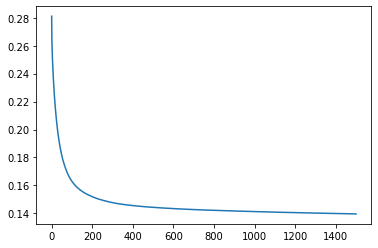

In [61]:
plt.plot(Test_loss)
plt.show()